In [1]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ArrestData.csv")

In [3]:
df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
0,236791704,2021-11-22T00:00:00.000,581.0,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409
1,237354740,2021-12-04T00:00:00.000,153.0,RAPE 3,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296
2,236081433,2021-11-09T00:00:00.000,681.0,"CHILD, ENDANGERING WELFARE",PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047
3,32311380,2007-06-18T00:00:00.000,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN
4,192799737,2019-01-26T00:00:00.000,177.0,SEXUAL ABUSE,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109


In [4]:
df.tail()

,arrest_key,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
5498645,255851599,2022-12-13T00:00:00.000,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",VTL051101A,M,M,32,0.0,25-44,M,BLACK,1000188.0,238820.0,40.822167,-73.942415
5498646,256469262,2022-12-16T00:00:00.000,198.0,CRIMINAL CONTEMPT 1,PL 21551B3,F,B,46,0.0,25-44,M,BLACK,1011750.0,250274.0,40.853578,-73.900591
5498647,260305039,2022-12-20T00:00:00.000,548.0,"GAMBLING, DEVICE, POSSESSION",PL 2253001,M,K,72,0.0,25-44,F,ASIAN / PACIFIC ISLANDER,981944.0,171869.0,40.638420,-74.008307
5498648,255843041,2022-12-13T00:00:00.000,101.0,ASSAULT 3,PL 1200001,M,M,5,0.0,45-64,M,ASIAN / PACIFIC ISLANDER,986159.0,200104.0,40.715917,-73.993111
5498649,261085179,2022-12-29T00:00:00.000,339.0,"LARCENY,PETIT FROM OPEN AREAS,",PL 1552500,M,B,40,0.0,25-44,F,BLACK,1006718.0,233117.0,40.806500,-73.918838


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   arrest_key         int64  
 1   arrest_date        object 
 2   pd_cd              float64
 3   pd_desc            object 
 4   law_code           object 
 5   law_cat_cd         object 
 6   arrest_boro        object 
 7   arrest_precinct    int64  
 8   jurisdiction_code  float64
 9   age_group          object 
 10  perp_sex           object 
 11  perp_race          object 
 12  x_coord_cd         float64
 13  y_coord_cd         float64
 14  latitude           float64
 15  longitude          float64
dtypes: float64(6), int64(2), object(8)
memory usage: 671.2+ MB


In [6]:
df['arrest_date'] = pd.to_datetime(df['arrest_date'])

In [7]:
df

,arrest_key,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
0,236791704,2021-11-22,581.0,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409
1,237354740,2021-12-04,153.0,RAPE 3,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296
2,236081433,2021-11-09,681.0,"CHILD, ENDANGERING WELFARE",PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047
3,32311380,2007-06-18,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN
4,192799737,2019-01-26,177.0,SEXUAL ABUSE,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498645,255851599,2022-12-13,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",VTL051101A,M,M,32,0.0,25-44,M,BLACK,1000188.0,238820.0,40.822167,-73.942415
5498646,256469262,2022-12-16,198.0,CRIMINAL CONTEMPT 1,PL 21551B3,F,B,46,0.0,25-44,M,BLACK,1011750.0,250274.0,40.853578,-73.900591
5498647,260305039,2022-12-20,548.0,"GAMBLING, DEVICE, POSSESSION",PL 2253001,M,K,72,0.0,25-44,F,ASIAN / PACIFIC ISLANDER,981944.0,171869.0,40.638420,-74.008307
5498648,255843041,2022-12-13,101.0,ASSAULT 3,PL 1200001,M,M,5,0.0,45-64,M,ASIAN / PACIFIC ISLANDER,986159.0,200104.0,40.715917,-73.993111


In [8]:
df.isnull().sum()

arrest_key               0
arrest_date              0
pd_cd                  874
pd_desc               9169
law_code               196
law_cat_cd           22001
arrest_boro              8
arrest_precinct          0
jurisdiction_code       10
age_group               17
perp_sex                 0
perp_race                0
x_coord_cd               1
y_coord_cd               1
latitude                 1
longitude                1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

arrest_key           0
arrest_date          0
pd_cd                0
pd_desc              0
law_code             0
law_cat_cd           0
arrest_boro          0
arrest_precinct      0
jurisdiction_code    0
age_group            0
perp_sex             0
perp_race            0
x_coord_cd           0
y_coord_cd           0
latitude             0
longitude            0
dtype: int64

In [11]:
df['arrest_key'].value_counts()

arrest_key
237354740    1
74366913     1
74421358     1
74438341     1
74385644     1
            ..
142364233    1
142462189    1
142882476    1
143034853    1
261085179    1
Name: count, Length: 5467083, dtype: int64

In [12]:
len(df['arrest_key'].value_counts())

5467083

In [13]:
df.drop(columns = 'arrest_key',inplace = True)
df

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
1,2021-12-04,153.0,RAPE 3,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296
2,2021-11-09,681.0,"CHILD, ENDANGERING WELFARE",PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047
4,2019-01-26,177.0,SEXUAL ABUSE,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109
7,2021-11-10,263.0,"ARSON 2,3,4",PL 1501001,F,B,41,72.0,25-44,M,WHITE HISPANIC,1017934.0,232221.0,40.804013,-73.878332
8,2021-12-28,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",PL 1702500,F,Q,113,0.0,18-24,M,BLACK,1045482.0,191341.0,40.691660,-73.779199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498645,2022-12-13,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",VTL051101A,M,M,32,0.0,25-44,M,BLACK,1000188.0,238820.0,40.822167,-73.942415
5498646,2022-12-16,198.0,CRIMINAL CONTEMPT 1,PL 21551B3,F,B,46,0.0,25-44,M,BLACK,1011750.0,250274.0,40.853578,-73.900591
5498647,2022-12-20,548.0,"GAMBLING, DEVICE, POSSESSION",PL 2253001,M,K,72,0.0,25-44,F,ASIAN / PACIFIC ISLANDER,981944.0,171869.0,40.638420,-74.008307
5498648,2022-12-13,101.0,ASSAULT 3,PL 1200001,M,M,5,0.0,45-64,M,ASIAN / PACIFIC ISLANDER,986159.0,200104.0,40.715917,-73.993111


In [14]:
df.shape

(5467083, 15)

In [15]:
top = df['age_group'].value_counts().head(5).index
top

Index(['25-44', '18-24', '45-64', '<18', '65+'], dtype='object', name='age_group')

In [16]:
df = df[df['age_group'].isin(top)]

In [17]:
df.shape

(5466905, 15)

In [18]:
df['perp_sex'].value_counts()

perp_sex
M    4545558
F     921347
Name: count, dtype: int64

In [19]:
df['perp_race'].value_counts()

perp_race
BLACK                             2659631
WHITE HISPANIC                    1415418
WHITE                              653050
BLACK HISPANIC                     442907
ASIAN / PACIFIC ISLANDER           230179
UNKNOWN                             52000
AMERICAN INDIAN/ALASKAN NATIVE      12357
OTHER                                1363
Name: count, dtype: int64

In [20]:
df=df[~(df['perp_race'] == "OTHER")]

In [21]:
import geocoder
df_sample = df.sample(frac=0.001, random_state=42)  # Set random_state for reproducibility

In [22]:
# Function to get area name from coordinates using geocoder
def get_area_name(row):
    location = geocoder.osm([row['latitude'], row['longitude']], method='reverse')
    return location.address

# Apply the function to each row of the sample and store the result in a new column
df_sample['area_name'] = df_sample.apply(get_area_name, axis=1)


KeyboardInterrupt: 

In [ ]:
df_sample.to_csv('AreaData.csv', index=False)

In [23]:
df_sample = pd.read_csv('AreaData.csv')

In [24]:
df_sample.head()

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com..."
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th..."
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist..."
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou..."
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St..."


In [25]:
df_sample['pin_code'] = df_sample['area_name'].str.extract(r'(\b\d{5}\b)')

In [26]:
df_sample

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name,pin_code
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com...",10010
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th...",10458
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist...",11225
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou...",10465
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St...",10314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2015-11-14,109.0,"ASSAULT 2,1,UNCLASSIFIED",PL 1200501,F,K,83,0.0,25-44,F,WHITE HISPANIC,1006376.0,192043.0,40.693771,-73.920213,2015,"119, Grove Street, Brooklyn, Kings County, Cit...",11221
5462,2018-07-03,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553001,F,K,84,0.0,25-44,M,BLACK,989003.0,192413.0,40.694813,-73.982861,2018,"176, Johnson Street, Brooklyn Navy Yard, Brook...",11201
5463,2015-05-05,478.0,"THEFT OF SERVICES, UNCLASSIFIED",PL 1651503,M,Q,112,0.0,18-24,M,BLACK,1031029.0,199612.0,40.714450,-73.831259,2015,"Kew Gardens-Union Turnpike (E,F), 80th Road, K...",11415
5464,2006-06-23,905.0,"INTOXICATED DRIVING,ALCOHOL",VTL11920M2,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,985110.0,215630.0,40.758539,-73.996897,2006,"West 40th Street, Hell's Kitchen, Manhattan, N...",10018


/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_13854/3326991395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='arrest_boro',palette='Set2')


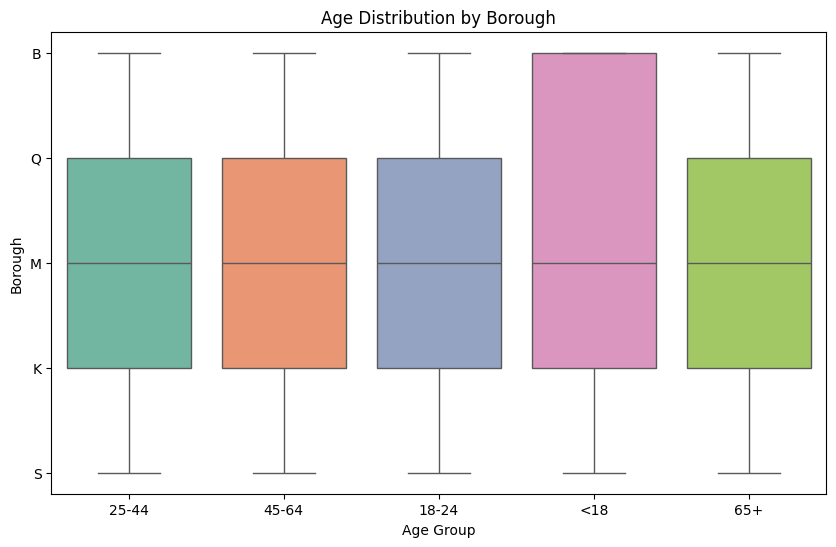

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='arrest_boro',palette='Set2')
plt.title('Age Distribution by Borough')
plt.xlabel('Age Group')
plt.ylabel('Borough')
plt.show()

/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_13854/1960254263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='arrest_boro',palette = 'pastel')


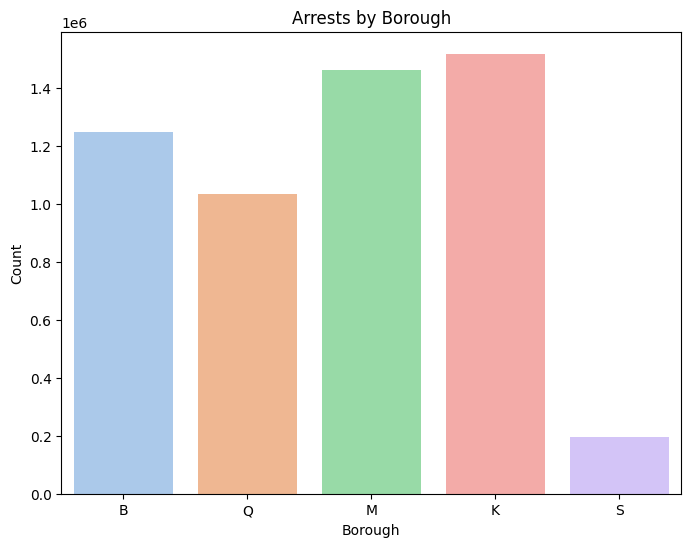

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='arrest_boro',palette = 'pastel')
plt.title('Arrests by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

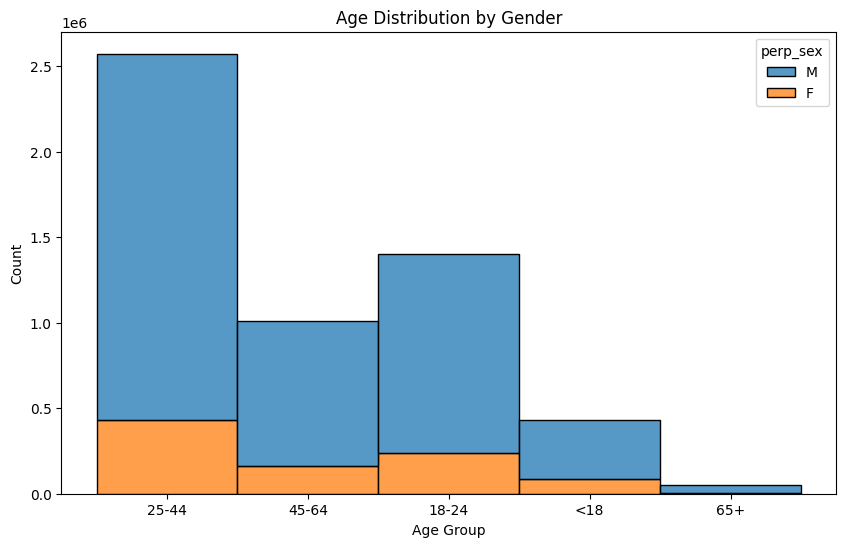

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age_group', hue='perp_sex', multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

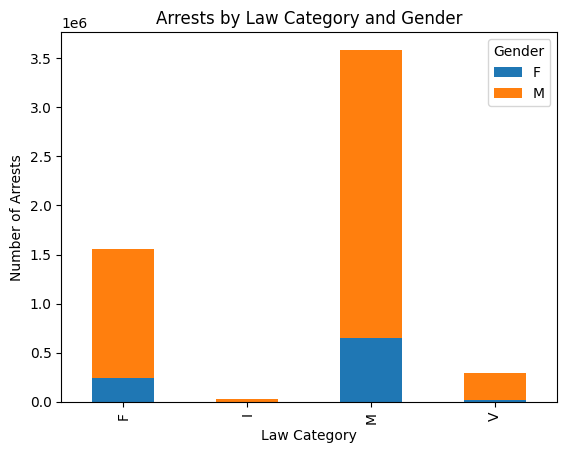

In [30]:
grouped = df.groupby(['law_cat_cd', 'perp_sex']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Law Category')
plt.ylabel('Number of Arrests')
plt.title('Arrests by Law Category and Gender')
plt.legend(title='Gender')
plt.show()

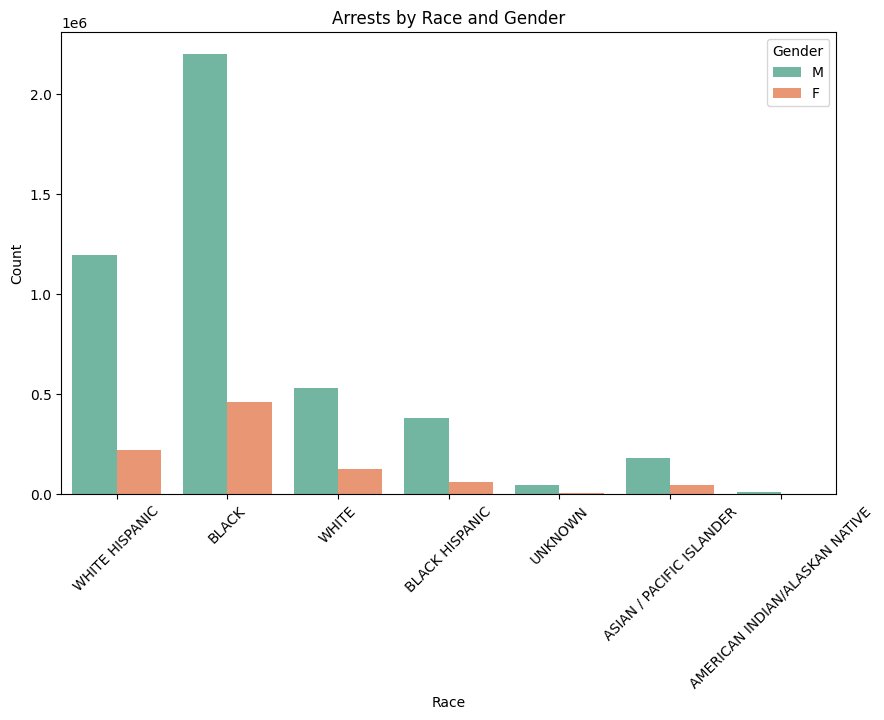

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='perp_race', hue='perp_sex', palette='Set2')
plt.title('Arrests by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_13854/3192324941.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


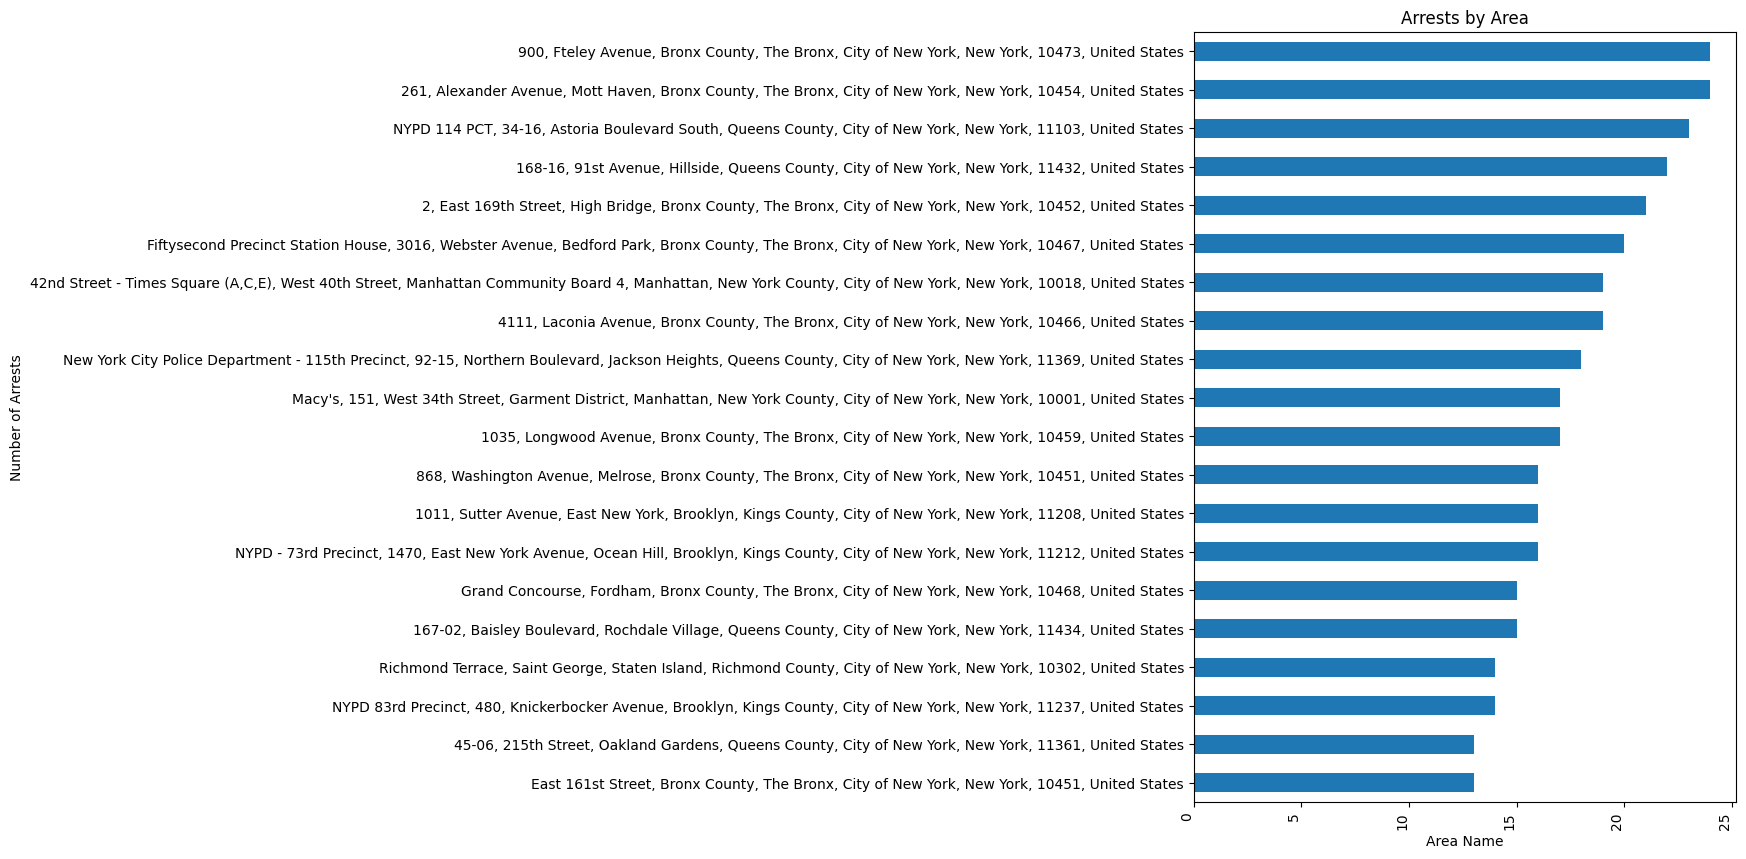

In [32]:
arrests_by_area = df_sample['area_name'].value_counts()
top_20_arrests_by_area = arrests_by_area.head(20)
# Create a bar plot
plt.figure(figsize=(7, 10))
top_20_arrests_by_area.sort_values().plot(kind='barh')
plt.title('Arrests by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [36]:
df_sample

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name,pin_code
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com...",10010
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th...",10458
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist...",11225
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou...",10465
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St...",10314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2015-11-14,109.0,"ASSAULT 2,1,UNCLASSIFIED",PL 1200501,F,K,83,0.0,25-44,F,WHITE HISPANIC,1006376.0,192043.0,40.693771,-73.920213,2015,"119, Grove Street, Brooklyn, Kings County, Cit...",11221
5462,2018-07-03,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553001,F,K,84,0.0,25-44,M,BLACK,989003.0,192413.0,40.694813,-73.982861,2018,"176, Johnson Street, Brooklyn Navy Yard, Brook...",11201
5463,2015-05-05,478.0,"THEFT OF SERVICES, UNCLASSIFIED",PL 1651503,M,Q,112,0.0,18-24,M,BLACK,1031029.0,199612.0,40.714450,-73.831259,2015,"Kew Gardens-Union Turnpike (E,F), 80th Road, K...",11415
5464,2006-06-23,905.0,"INTOXICATED DRIVING,ALCOHOL",VTL11920M2,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,985110.0,215630.0,40.758539,-73.996897,2006,"West 40th Street, Hell's Kitchen, Manhattan, N...",10018


<Figure size 2400x1600 with 0 Axes>

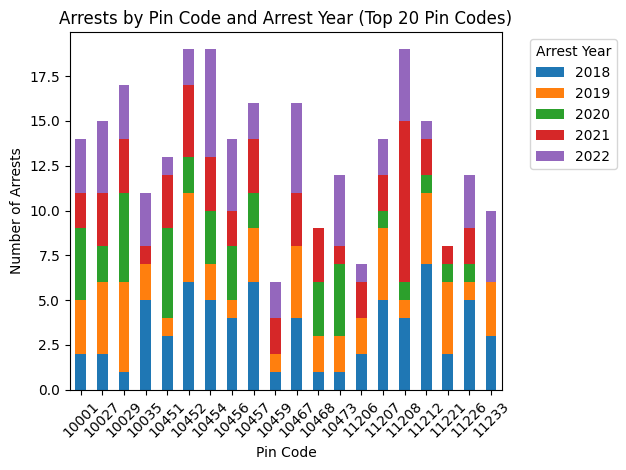

In [37]:
top_20_pin_codes = df_sample['pin_code'].value_counts().index[:20]

# Filter the DataFrame to include only rows with the top 20 pin codes and arrest year from 2018 to 2023
df_top_20 = df_sample[df_sample['pin_code'].isin(top_20_pin_codes) & df_sample['arrest_year'].between(2018, 2023)]

# Group the data by pin code and arrest year, then count the number of arrests
arrests_by_pin_year = df_top_20.groupby(['pin_code', 'arrest_year']).size().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(24, 16))
arrests_by_pin_year.plot(kind='bar', stacked=True)
plt.title('Arrests by Pin Code and Arrest Year (Top 20 Pin Codes)')
plt.xlabel('Pin Code')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Arrest Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_13854/2709277637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='arrest_precinct', palette='viridis')


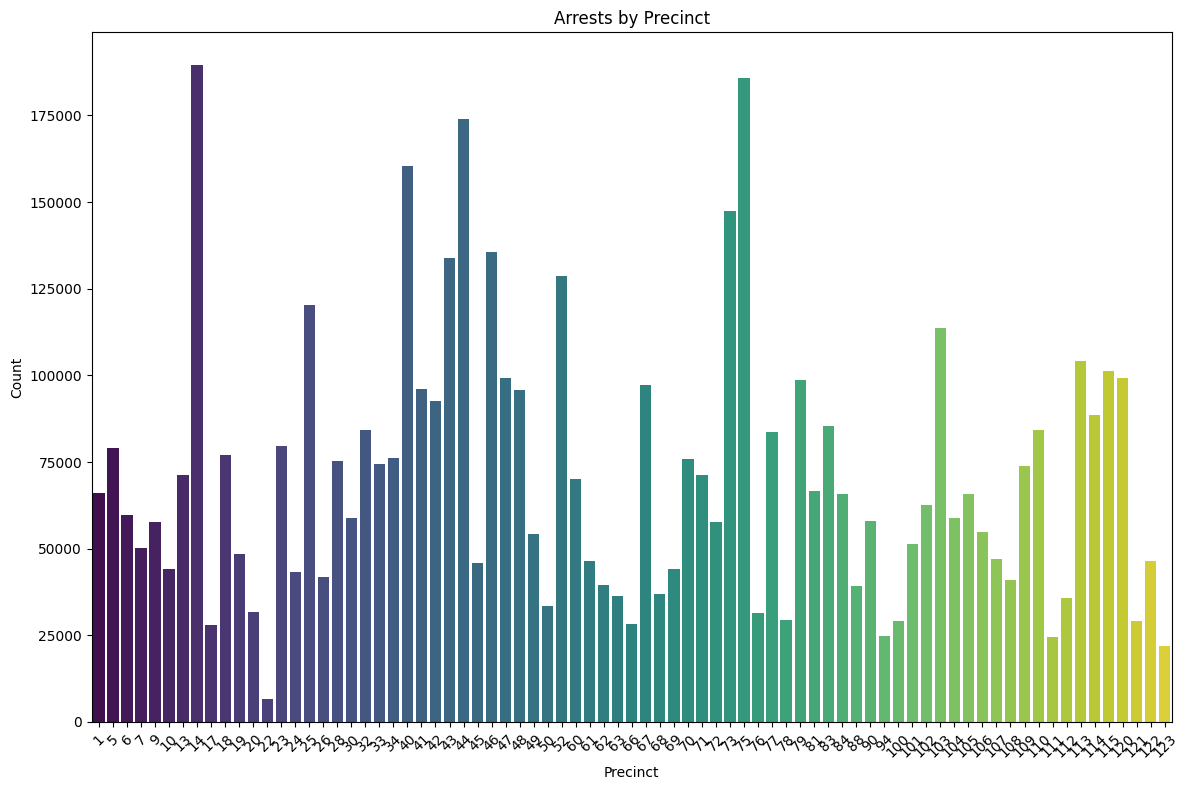

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='arrest_precinct', palette='viridis')
plt.title('Arrests by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

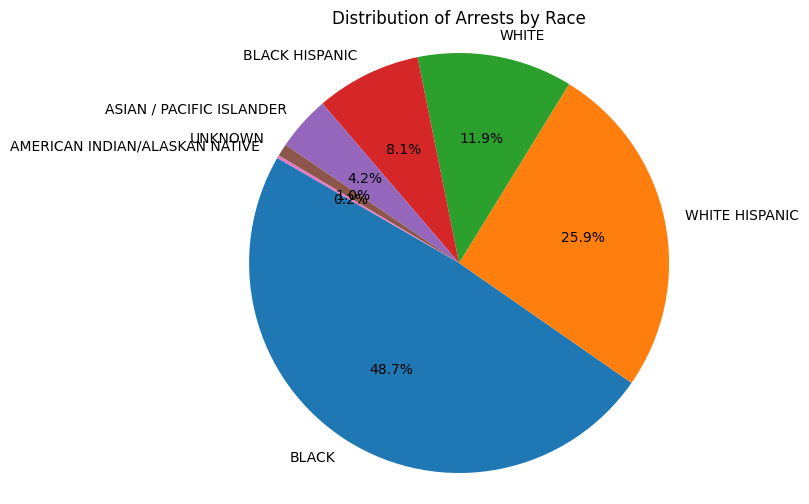

In [72]:
plt.figure(figsize=(8, 6))
race_counts = df['perp_race'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Distribution of Arrests by Race')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

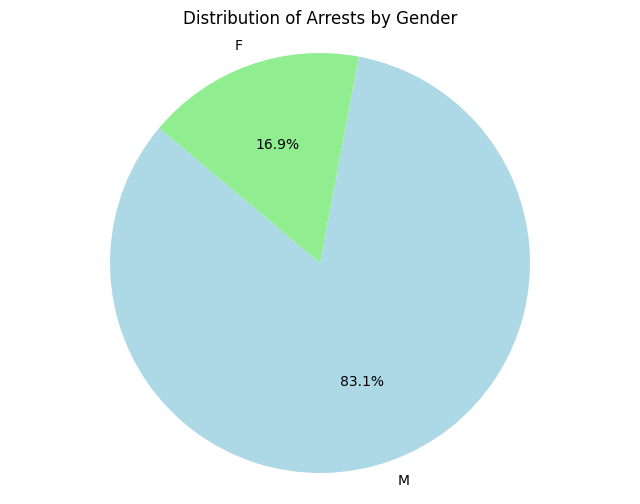

In [40]:
plt.figure(figsize=(8, 6))
gender_counts = df['perp_sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Arrests by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [41]:
most_common_areas = df_sample['area_name'].value_counts().index[:20]
df_filtered = df_sample[df_sample['area_name'].isin(most_common_areas)]

In [42]:
import folium

# Create a map centered around New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add markers for each coordinate
for _, row in df_filtered.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Arrest Precinct: {row['arrest_precinct']}").add_to(nyc_map)

# Save the map as an HTML file
#nyc_map.save('nyc_arrests_map.html')

In [43]:
nyc_map

In [44]:
df_sample

,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,arrest_year,area_name,pin_code
0,2017-10-29,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,988972.0,207813.0,40.737082,-73.982962,2017,"221, East 21st Street, Gramercy, Manhattan Com...",10010
1,2010-09-24,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,1013888.0,253284.0,40.861839,-73.892853,2010,"2514, Marion Avenue, Fordham, Bronx County, Th...",10458
2,2015-07-29,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,998007.0,179260.0,40.658702,-73.950418,2015,"1177, Nostrand Avenue, Brooklyn Community Dist...",11225
3,2007-05-09,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,1032140.0,242004.0,40.830799,-73.826949,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou...",10465
4,2017-08-11,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,950012.0,162645.0,40.613041,-74.123318,2017,"1800, Victory Boulevard, Castleton Corners, St...",10314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,2015-11-14,109.0,"ASSAULT 2,1,UNCLASSIFIED",PL 1200501,F,K,83,0.0,25-44,F,WHITE HISPANIC,1006376.0,192043.0,40.693771,-73.920213,2015,"119, Grove Street, Brooklyn, Kings County, Cit...",11221
5462,2018-07-03,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553001,F,K,84,0.0,25-44,M,BLACK,989003.0,192413.0,40.694813,-73.982861,2018,"176, Johnson Street, Brooklyn Navy Yard, Brook...",11201
5463,2015-05-05,478.0,"THEFT OF SERVICES, UNCLASSIFIED",PL 1651503,M,Q,112,0.0,18-24,M,BLACK,1031029.0,199612.0,40.714450,-73.831259,2015,"Kew Gardens-Union Turnpike (E,F), 80th Road, K...",11415
5464,2006-06-23,905.0,"INTOXICATED DRIVING,ALCOHOL",VTL11920M2,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,985110.0,215630.0,40.758539,-73.996897,2006,"West 40th Street, Hell's Kitchen, Manhattan, N...",10018


In [45]:
df3 = df_sample.drop(columns = ['arrest_date','x_coord_cd',	'y_coord_cd','latitude','longitude'])
df3

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,arrest_year,area_name,pin_code
0,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,2017,"221, East 21st Street, Gramercy, Manhattan Com...",10010
1,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,2010,"2514, Marion Avenue, Fordham, Bronx County, Th...",10458
2,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,2015,"1177, Nostrand Avenue, Brooklyn Community Dist...",11225
3,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,2007,"2899, Barkley Avenue, Schuylerville, Bronx Cou...",10465
4,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,2017,"1800, Victory Boulevard, Castleton Corners, St...",10314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,109.0,"ASSAULT 2,1,UNCLASSIFIED",PL 1200501,F,K,83,0.0,25-44,F,WHITE HISPANIC,2015,"119, Grove Street, Brooklyn, Kings County, Cit...",11221
5462,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553001,F,K,84,0.0,25-44,M,BLACK,2018,"176, Johnson Street, Brooklyn Navy Yard, Brook...",11201
5463,478.0,"THEFT OF SERVICES, UNCLASSIFIED",PL 1651503,M,Q,112,0.0,18-24,M,BLACK,2015,"Kew Gardens-Union Turnpike (E,F), 80th Road, K...",11415
5464,905.0,"INTOXICATED DRIVING,ALCOHOL",VTL11920M2,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,2006,"West 40th Street, Hell's Kitchen, Manhattan, N...",10018


In [46]:
df3.drop(columns = ['area_name'], inplace = True)
df3

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,arrest_year,pin_code
0,139.0,"MURDER,UNCLASSIFIED",PL 1252501,F,M,13,0.0,25-44,M,BLACK,2017,10010
1,809.0,TAX LAW,TAX1817000,M,B,52,0.0,45-64,M,BLACK,2010,10458
2,760.0,"BRIBERY,PUBLIC ADMINISTRATION",PL 2154002,F,K,71,0.0,18-24,M,BLACK,2015,11225
3,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553500,F,B,45,0.0,25-44,M,BLACK HISPANIC,2007,10465
4,101.0,ASSAULT 3,PL 1200001,M,S,120,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,2017,10314
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,109.0,"ASSAULT 2,1,UNCLASSIFIED",PL 1200501,F,K,83,0.0,25-44,F,WHITE HISPANIC,2015,11221
5462,439.0,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",PL 1553001,F,K,84,0.0,25-44,M,BLACK,2018,11201
5463,478.0,"THEFT OF SERVICES, UNCLASSIFIED",PL 1651503,M,Q,112,0.0,18-24,M,BLACK,2015,11415
5464,905.0,"INTOXICATED DRIVING,ALCOHOL",VTL11920M2,M,M,10,0.0,18-24,M,ASIAN / PACIFIC ISLANDER,2006,10018


In [47]:
non_num_var = df3.select_dtypes(exclude=['number']).columns.tolist()
non_num_var.append('arrest_year')
non_num_var

['pd_desc',
 'law_code',
 'law_cat_cd',
 'arrest_boro',
 'age_group',
 'perp_sex',
 'perp_race',
 'pin_code',
 'arrest_year']

In [48]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in non_num_var:
    df3[i] = label.fit_transform(df3[i])

In [49]:
df3

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,arrest_year,pin_code
0,139.0,119,69,0,2,13,0.0,1,1,2,11,9
1,809.0,168,350,2,0,52,0.0,2,1,2,4,79
2,760.0,16,210,0,1,71,0.0,0,1,2,9,133
3,439.0,90,134,0,0,45,0.0,1,1,3,1,86
4,101.0,12,31,2,4,120,0.0,1,1,1,11,69
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,109.0,11,38,0,1,83,0.0,1,0,6,9,129
5462,439.0,90,129,0,1,84,0.0,1,1,2,12,110
5463,478.0,170,157,2,3,112,0.0,0,1,2,9,177
5464,905.0,85,387,2,2,10,0.0,0,1,1,0,16


## PCA and Standard Scalar

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3)

In [94]:
df4 = pd.DataFrame(X_scaled, columns=df3.columns)

In [95]:
df4

,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,arrest_year,pin_code
0,-1.384237,0.322721,-1.042755,-1.533950,0.427451,-1.388312,-0.129685,-0.174485,0.448686,-0.792100,0.960155,-1.533816
1,1.154237,1.134385,1.580431,0.557487,-1.331920,-0.244996,-0.129685,0.754176,0.448686,-0.792100,-0.593620,-0.263752
2,0.968587,-1.383430,0.273506,-1.533950,-0.452235,0.312005,-0.129685,-1.103146,0.448686,-0.792100,0.516219,0.716012
3,-0.247607,-0.157651,-0.435968,-1.533950,-1.331920,-0.450206,-0.129685,-0.174485,0.448686,-0.241748,-1.259523,-0.136745
4,-1.528210,-1.449688,-1.397492,0.557487,2.186822,1.748479,-0.129685,-0.174485,0.448686,-1.342451,0.960155,-0.445190
...,...,...,...,...,...,...,...,...,...,...,...,...
5461,-1.497900,-1.466253,-1.332145,-1.533950,-0.452235,0.663794,-0.129685,-0.174485,-2.228733,1.409307,0.516219,0.643437
5462,-0.247607,-0.157651,-0.482644,-1.533950,-0.452235,0.693110,-0.129685,-0.174485,0.448686,-0.792100,1.182123,0.298705
5463,-0.099845,1.167514,-0.221259,0.557487,1.307136,1.513952,-0.129685,-1.103146,0.448686,-0.792100,0.516219,1.514338
5464,1.517958,-0.240474,1.925833,0.557487,0.427451,-1.476259,-0.129685,-1.103146,0.448686,-1.342451,-1.481491,-1.406809


<Axes: >

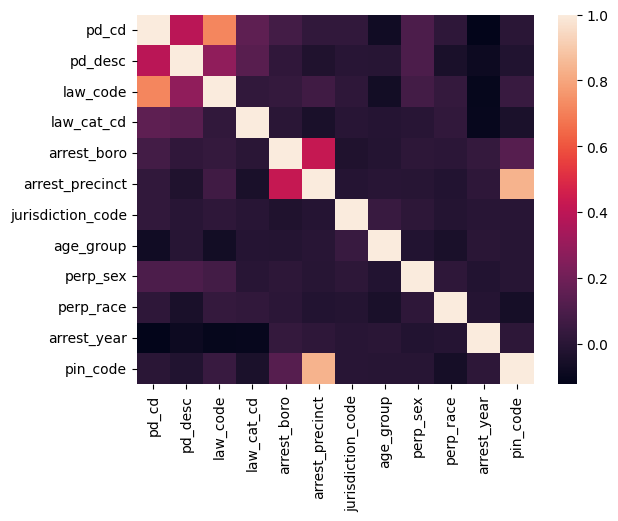

In [96]:
sns.heatmap(df4.corr())

In [97]:
from sklearn.decomposition import PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(df4)

PCA(n_components=2)

In [98]:
score = pca.transform(df4)

In [99]:
score_df = pd.DataFrame(score, columns = ['PC1','PC2'])
score_df
#,'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'

,PC1,PC2
0,-2.257545,-0.558390
1,1.514670,-1.847419
2,0.299599,0.707325
3,-0.846722,-0.457018
4,-1.080143,2.678483
...,...,...
5461,-2.201298,2.198701
5462,-0.477138,1.067489
5463,1.664738,1.821193
5464,1.309106,-2.674944


In [117]:
x = score_df[['PC1','PC2']]
x

,PC1,PC2
0,-2.257545,-0.558390
1,1.514670,-1.847419
2,0.299599,0.707325
3,-0.846722,-0.457018
4,-1.080143,2.678483
...,...,...
5461,-2.201298,2.198701
5462,-0.477138,1.067489
5463,1.664738,1.821193
5464,1.309106,-2.674944


In [118]:
from sklearn.cluster import KMeans
wcss =[]#within-cluster sum of squares
for i in range (1,11):
    model = KMeans(n_clusters =i)
    y_KMeans = model.fit_predict(x)
    wcss.append(model.inertia_)

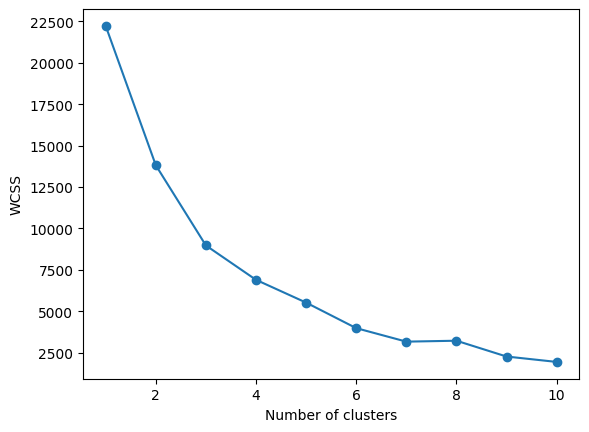

In [119]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [121]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(x)

KMeans(n_clusters=9)

In [122]:
x['Cluster'] = kmeans.labels_

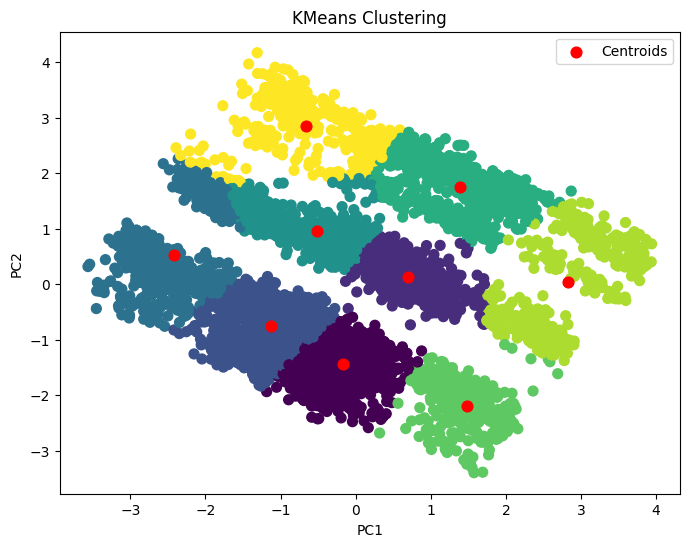

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(x['PC1'], x['PC2'], c=x['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='red', marker='o', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## K-Means

In [109]:
#x = score_df[['PC1','PC2']]
x = df3[["pin_code","arrest_precinct"]]
x

,pin_code,arrest_precinct
0,9,13
1,79,52
2,133,71
3,86,45
4,69,120
...,...,...
5461,129,83
5462,110,84
5463,177,112
5464,16,10


In [110]:
from sklearn.cluster import KMeans
wcss =[]#within-cluster sum of squares
for i in range (1,11):
    model = KMeans(n_clusters =i)
    y_KMeans = model.fit_predict(x)
    wcss.append(model.inertia_)

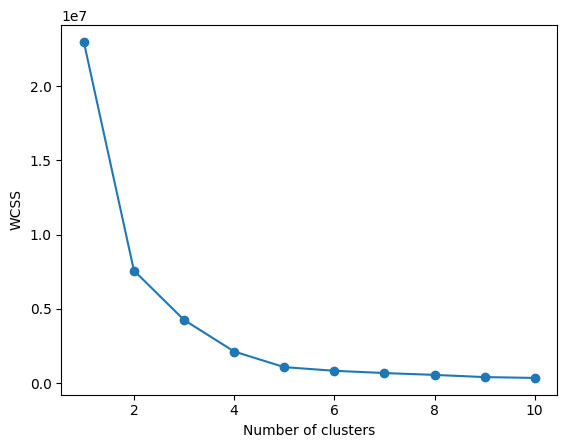

In [111]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
x = df3[["pin_code","arrest_precinct"]]
x

,pin_code,arrest_precinct
0,9,13
1,79,52
2,133,71
3,86,45
4,69,120
...,...,...
5461,129,83
5462,110,84
5463,177,112
5464,16,10


In [61]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    cluster_labels = model.labels_
    silhouette_avg.append(silhouette_score(x, cluster_labels))

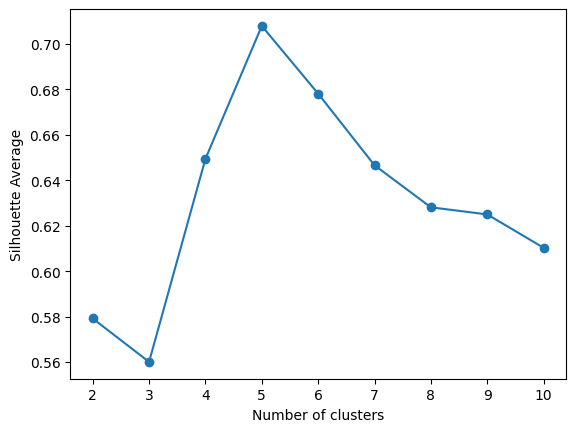

In [62]:
plt.plot(range(2, 11),silhouette_avg, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Average')
plt.show()

In [112]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [113]:
x['Cluster'] = kmeans.labels_

/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_13854/2148186472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = kmeans.labels_


In [114]:
x

,pin_code,arrest_precinct,Cluster
0,9,13,2
1,79,52,0
2,133,71,3
3,86,45,0
4,69,120,4
...,...,...,...
5461,129,83,3
5462,110,84,3
5463,177,112,1
5464,16,10,2


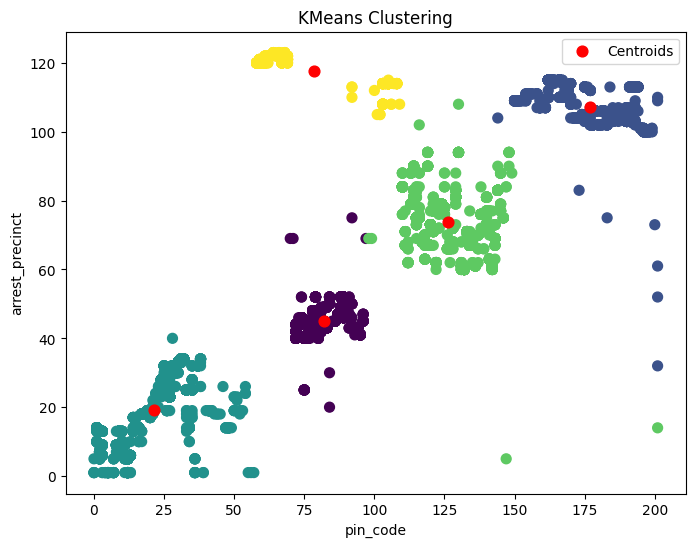

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(x['pin_code'], x['arrest_precinct'], c=x['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='red', marker='o', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('pin_code')
plt.ylabel('arrest_precinct')
plt.legend()
plt.show()

In [67]:
import scipy.cluster.hierarchy as sch

In [68]:
x = df3[["pin_code","arrest_precinct"]]
x

,pin_code,arrest_precinct
0,9,13
1,79,52
2,133,71
3,86,45
4,69,120
...,...,...
5461,129,83
5462,110,84
5463,177,112
5464,16,10


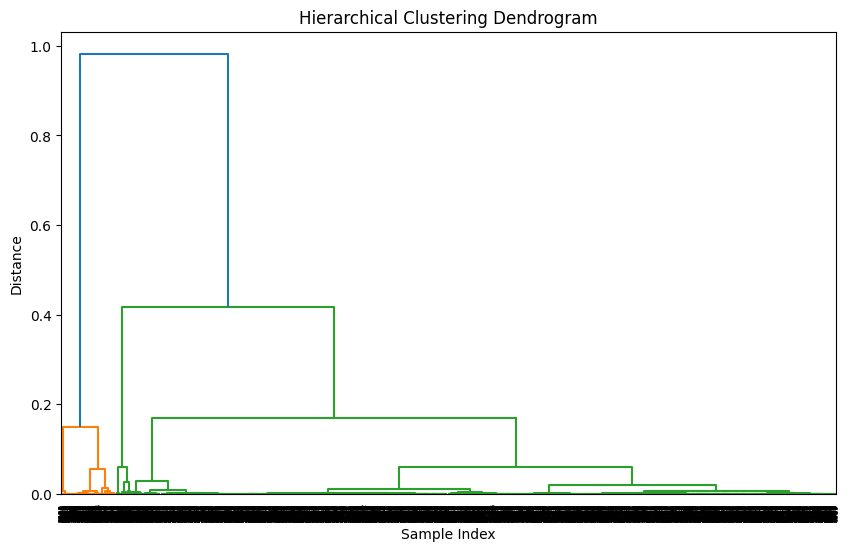

In [69]:
plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(x, method='complete', metric='cosine'))
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()